In [2]:
#https://github.com/pomber/covid19
import numpy as np
import pandas as pd
import json, requests

import matplotlib.pyplot as plt
import datetime

In [3]:
df = pd.read_csv('../data/world_corona19_data.csv', sep=',')
df['date'] = df['date'].astype('datetime64[ns]')

today = df.date.max().date()
tomorrow = today + datetime.timedelta(days=1)
yesterday = today - datetime.timedelta(days=1)
qtdeMonitored = 10
df.tail()

,country,date,cases,deaths,recoveries,day,case_day,death_day,recovery_day,%var_case_day,...,recovery_day_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_case_day_million,avg7_death_day_million,avg7_recovery_day_million,perc_death,perc_recovery,active_cases
27869,Lesotho,2020-07-26,505,12,128,75,86.0,3,59,43.33,...,27.8,20.0,0.0,8.0,9.814,0.400,3.971,2.38,25.35,365
27870,Lesotho,2020-07-27,505,12,128,76,0.0,0,0,-100.00,...,0.0,20.0,0.0,8.0,9.814,0.400,3.971,2.38,25.35,365
27871,Lesotho,2020-07-28,505,12,128,77,0.0,0,0,0.00,...,0.0,20.0,0.0,8.0,9.814,0.400,3.971,2.38,25.35,365
27872,Lesotho,2020-07-29,576,13,141,78,71.0,1,13,0.00,...,6.1,31.0,1.0,10.0,14.586,0.471,4.843,2.26,24.48,422
27873,Lesotho,2020-07-30,604,13,144,79,28.0,0,3,-60.56,...,1.4,35.0,1.0,10.0,16.471,0.471,5.043,2.15,23.84,447


In [4]:
countries = df['country'].unique()
# countries

----------------------------
### World - Analysis and monitoring

#### Top 5 deadliest countries + Brazil

In [5]:
cols = ['country','day','date','cases','case_day','deaths','death_day', 'perc_death', 'cases_million',  'deaths_million', 'avg7_case_day_million', 'avg7_death_day_million', 'avg7_recovery_day_million']
df_top_deaths = df[df['date']==str(today)].sort_values('deaths_million', ascending = False)

df_top_deaths.reset_index(0, inplace=True)
df_top_deaths.index = df_top_deaths.index + 1
df_top_deaths = df_top_deaths[cols].head(qtdeMonitored).append(df_top_deaths[df_top_deaths['country']=='Brazil'][cols])
df_top_deaths

,country,day,date,cases,case_day,deaths,death_day,perc_death,cases_million,deaths_million,avg7_case_day_million,avg7_death_day_million,avg7_recovery_day_million
1,San Marino,155,2020-07-30,699,0.0,42,0,6.01,20641.4,1240.3,0.000,0.000,4.214
2,Belgium,178,2020-07-30,68006,671.0,9840,4,14.47,5893.4,852.7,39.100,0.343,1.786
3,United Kingdom,182,2020-07-30,303910,847.0,46084,38,15.16,4500.4,682.4,10.957,0.943,0.014
4,Andorra,151,2020-07-30,922,4.0,52,0,5.64,11951.4,674.0,61.100,0.000,5.557
5,Spain,181,2020-07-30,285430,2789.0,28443,2,9.96,6107.2,608.6,46.657,0.029,0.000
6,Italy,182,2020-07-30,247158,382.0,35132,3,14.21,4081.9,580.2,4.300,0.100,4.600
7,Peru,147,2020-07-30,400683,0.0,18816,0,4.70,12324.7,578.8,130.014,5.114,122.914
8,Sweden,182,2020-07-30,80100,318.0,5739,9,7.16,7981.0,571.8,19.043,0.900,0.000
9,Chile,159,2020-07-30,353536,1961.0,9377,99,2.65,18654.3,494.8,111.386,4.071,114.557
10,France,189,2020-07-30,222469,1392.0,30241,15,13.59,3415.8,464.3,12.729,0.129,2.257


#### Top 5 most transmissible countries + Brazil

In [6]:
df_top_cases = df[df['date']==str(today)].sort_values('cases_million', ascending = False)

df_top_cases.reset_index(0, inplace=True)
df_top_cases.index = df_top_cases.index + 1
df_top_cases = df_top_cases[cols].head(qtdeMonitored).append(df_top_cases[df_top_cases['country']=='Brazil'][cols])
df_top_cases

,country,day,date,cases,case_day,deaths,death_day,perc_death,cases_million,deaths_million,avg7_case_day_million,avg7_death_day_million,avg7_recovery_day_million
1,Qatar,153,2020-07-30,110460,307.0,171,2,0.15,39003.3,60.4,111.771,0.357,106.771
2,Bahrain,158,2020-07-30,40755,444.0,146,2,0.36,24833.0,89.0,240.157,1.029,256.343
3,San Marino,155,2020-07-30,699,0.0,42,0,6.01,20641.4,1240.3,0.000,0.000,4.214
4,Chile,159,2020-07-30,353536,1961.0,9377,99,2.65,18654.3,494.8,111.386,4.071,114.557
5,Oman,158,2020-07-30,79159,590.0,421,9,0.53,15911.4,84.6,187.057,1.886,289.229
6,Kuwait,158,2020-07-30,66529,626.0,445,1,0.67,15813.6,105.8,158.129,0.843,172.600
7,Panama,143,2020-07-30,64191,922.0,1397,23,2.18,15116.4,329.0,248.057,6.343,214.986
8,US,191,2020-07-30,4494601,67619.0,152055,1233,3.38,13522.4,457.5,195.886,3.271,77.743
9,Armenia,152,2020-07-30,38196,259.0,728,5,1.91,12914.0,246.1,98.243,1.943,150.800
10,Brazil,156,2020-07-30,2610102,57837.0,91263,1129,3.50,12367.2,432.4,218.371,4.857,227.771


#### Countries to be analised

In [7]:
#inform the countries you want to analise
monitoredCountries = ['Brazil','Italy', 'United Kingdom', 'Spain', 'US', 'France', 'Belgium','Sweden']

#### Cases and deaths 

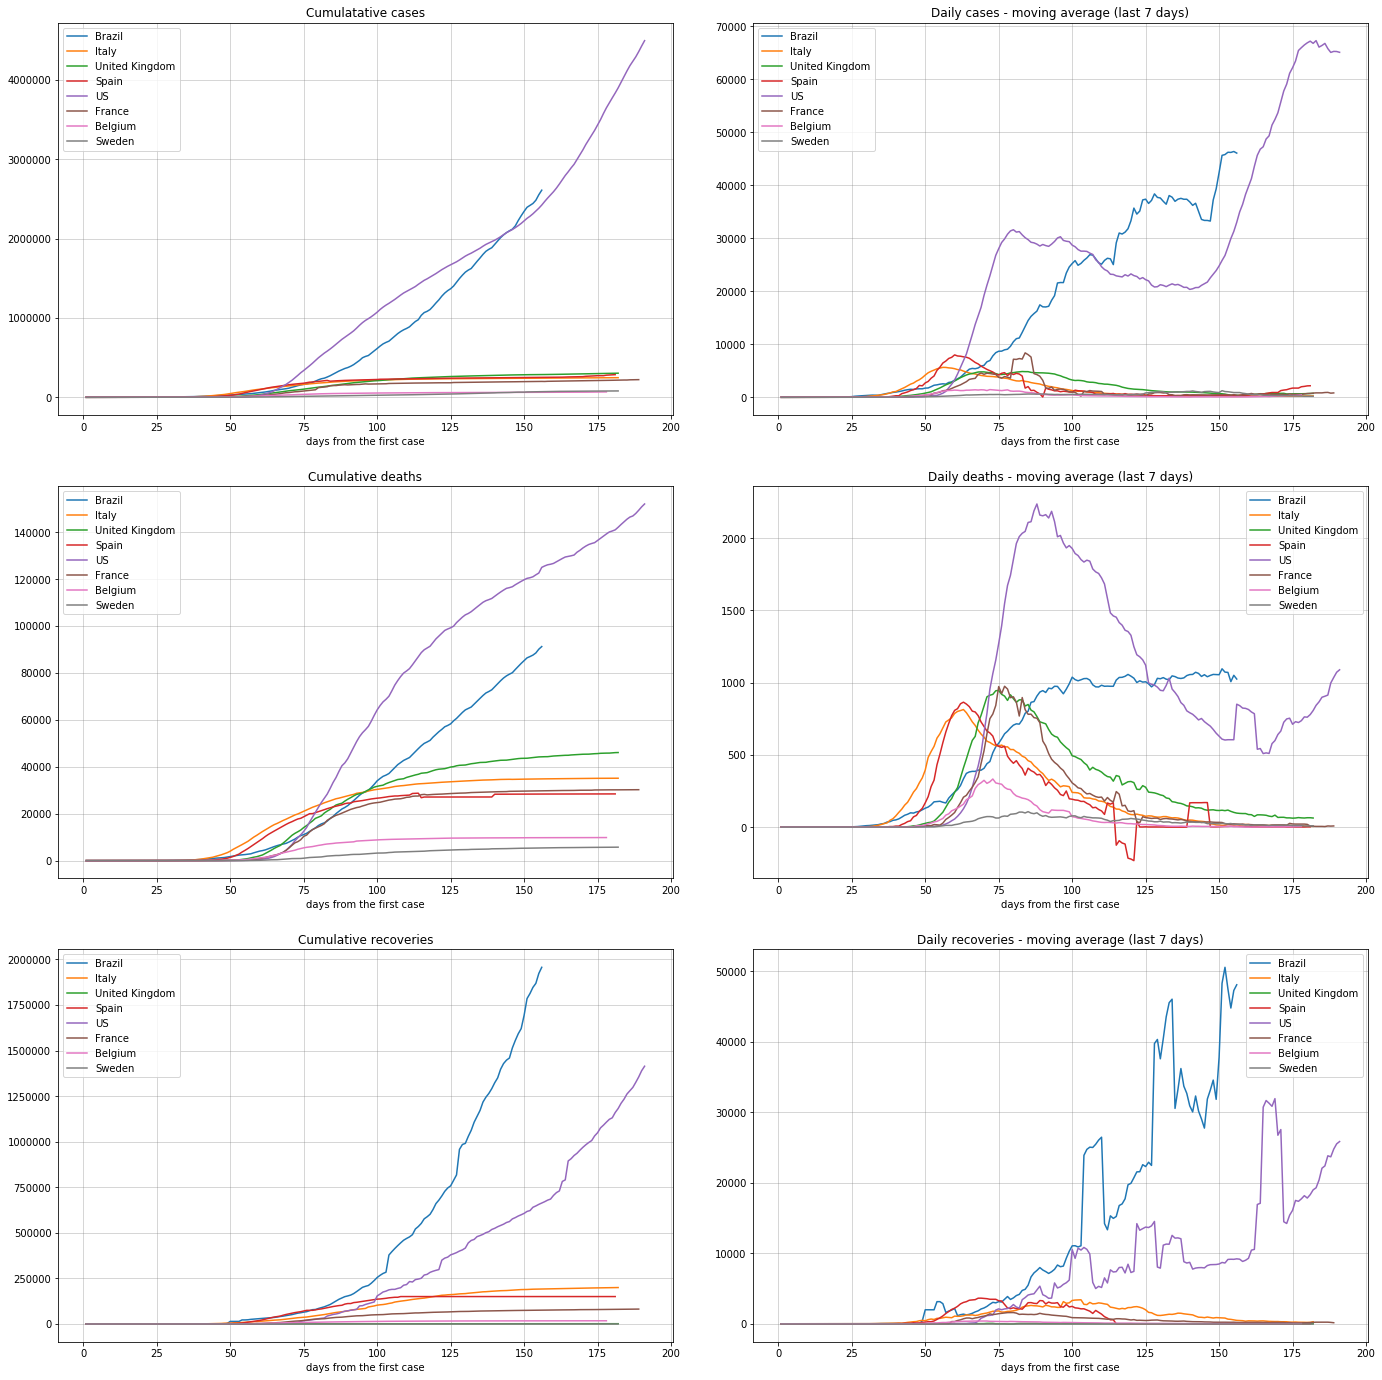

In [8]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20, 20))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulatative cases")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Daily cases - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

ax3.set_title("Cumulative deaths")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)

ax4.set_title("Daily deaths - moving average (last 7 days)")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)

ax5.set_title("Cumulative recoveries")
ax5.set_xlabel("days from the first case")
ax5.grid(color='gray', alpha = 0.4)

ax6.set_title("Daily recoveries - moving average (last 7 days)")
ax6.set_xlabel("days from the first case")
ax6.grid(color='gray', alpha = 0.4)

for country in monitoredCountries:
    data = df[df['country'] == country]
    ax1.plot(data.day, data.cases, label = country)
    ax2.plot(data.day, data.avg7_cases, label = country)
    ax3.plot(data.day, data.deaths, label = country)
    ax4.plot(data.day, data.avg7_deaths, label = country)
    ax5.plot(data.day, data.recoveries, label = country)
    ax6.plot(data.day, data.avg7_recoveries, label = country)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
fig.savefig('../analysis/world_cases_deaths.png')

#### Cases, deaths and recoveries per million 
(million of population - normalizes per country population)

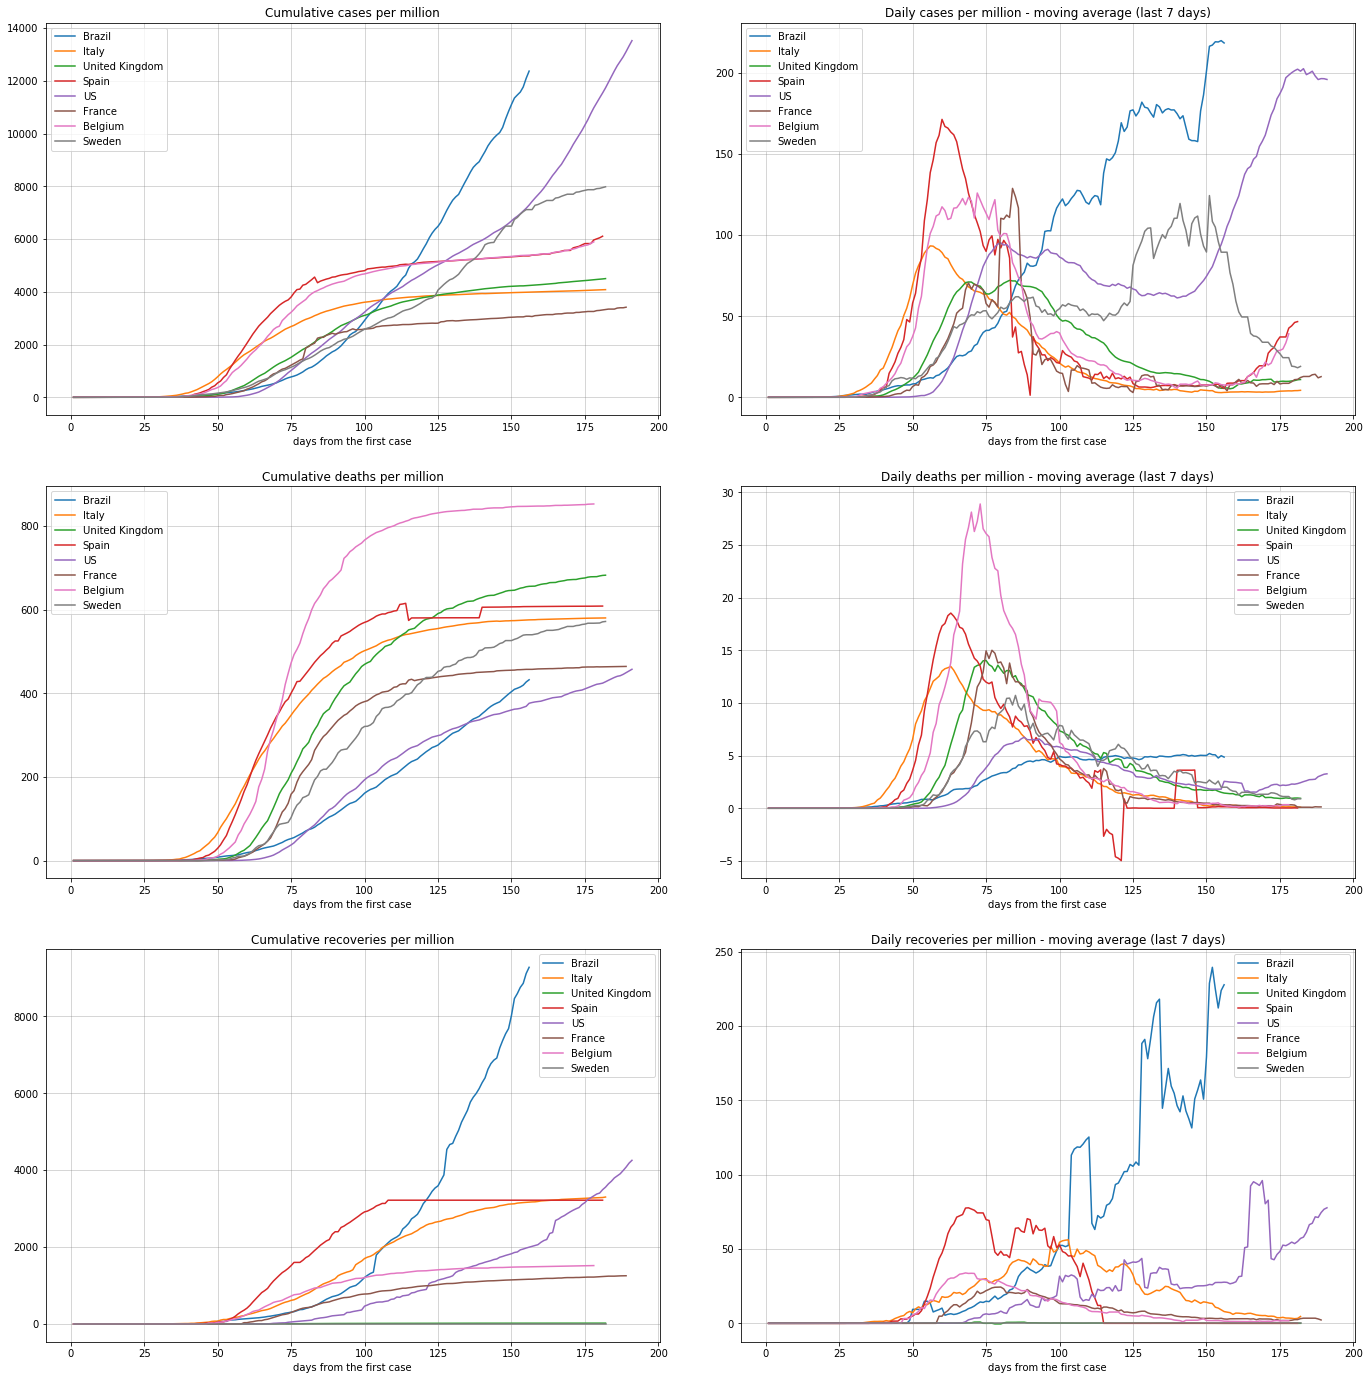

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20, 20))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulative cases per million")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Daily cases per million - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

ax3.set_title("Cumulative deaths per million")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)

ax4.set_title("Daily deaths per million - moving average (last 7 days)")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)

ax5.set_title("Cumulative recoveries per million")
ax5.set_xlabel("days from the first case")
ax5.grid(color='gray', alpha = 0.4)

ax6.set_title("Daily recoveries per million - moving average (last 7 days)")
ax6.set_xlabel("days from the first case")
ax6.grid(color='gray', alpha = 0.4)

for country in monitoredCountries:
    data = df[df['country'] == country]
    ax1.plot(data.day, data.cases_million, label = country)
    ax2.plot(data.day, data.avg7_case_day_million, label = country)
    ax3.plot(data.day, data.deaths_million, label = country)
    ax4.plot(data.day, data.avg7_death_day_million, label = country)
    ax5.plot(data.day, data.recoveries_million, label = country)
    ax6.plot(data.day, data.avg7_recovery_day_million, label = country)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

fig.savefig('../analysis/world_cases_deaths_million.png')

#### Active cases, world overview, % recoveries and mortality

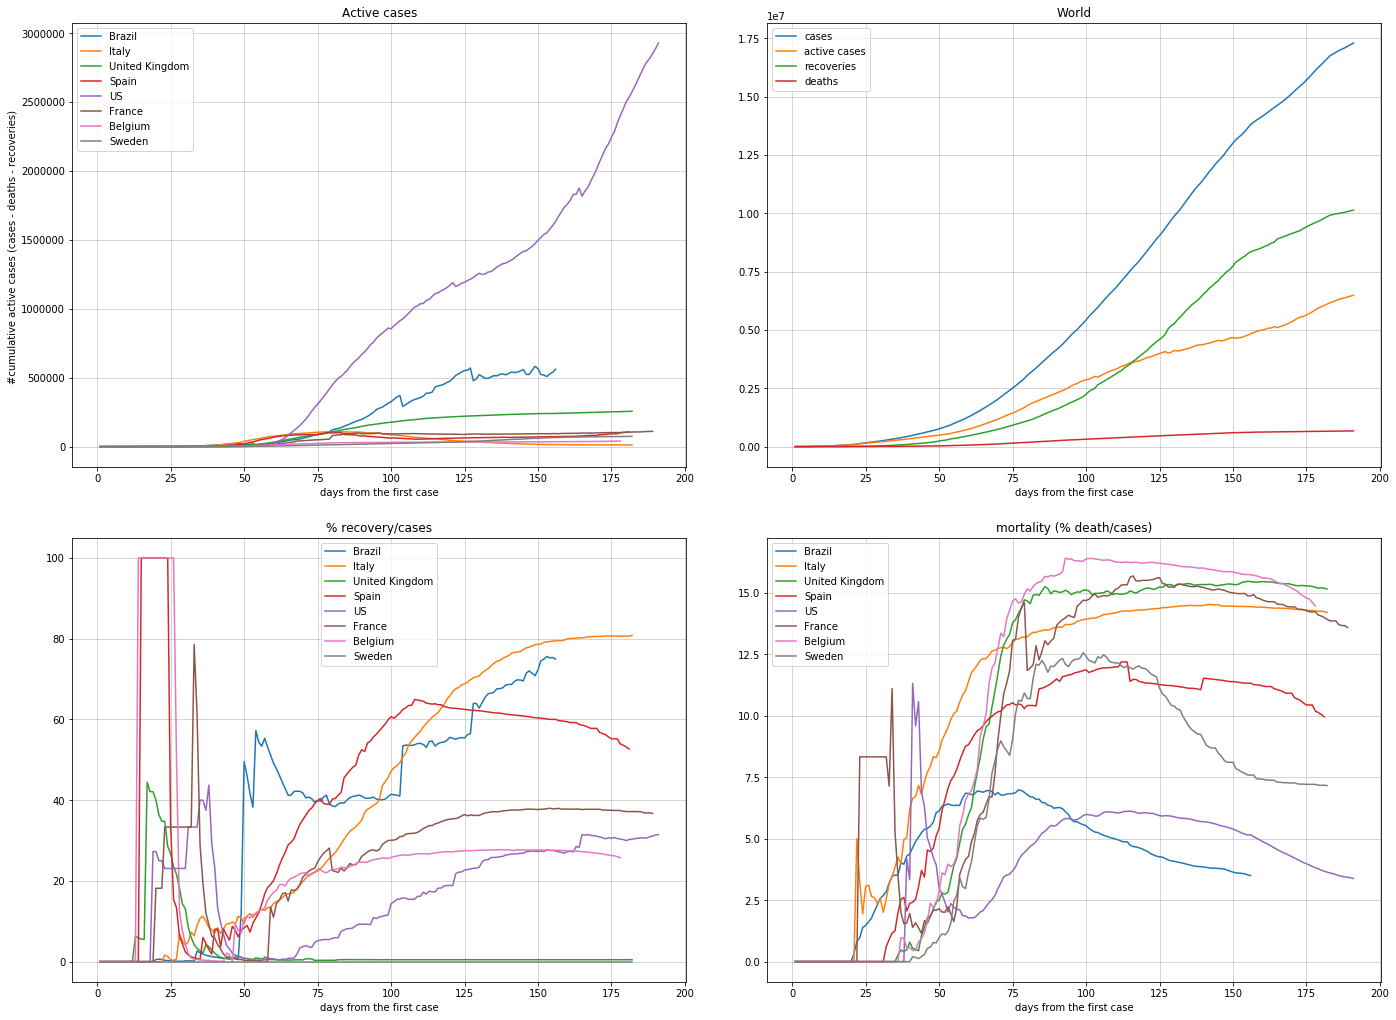

In [10]:
fig, ((ax1, ax2), (ax3, ax4),) = plt.subplots(2,2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

ax3.set_title("% recovery/cases")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)

ax4.set_title("mortality (% death/cases)")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)

ax1.set_title("Active cases")
ax1.set_xlabel("days from the first case")
ax1.set_ylabel("#cumulative active cases (cases - deaths - recoveries) ")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("World")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

for country in monitoredCountries:
    ax3.plot(df[df['country'] == country].day, df[df['country'] == country].perc_recovery, label = country)
    ax4.plot(df[df['country'] == country].day, df[df['country'] == country].perc_death, label = country)
    ax1.plot(df[df['country'] == country].day, df[df['country'] == country].active_cases, label = country)

days = np.arange(1, len(df.groupby('day')['cases'].count())+1,1)
cases_world = df.groupby('day')['case_day'].sum().to_numpy().cumsum()
deaths_world = df.groupby('day')['death_day'].sum().to_numpy().cumsum()
recuperacoes_world = df.groupby('day')['recovery_day'].sum().to_numpy().cumsum()
cases_ativos_world = cases_world - deaths_world - recuperacoes_world

ax2.plot(days, cases_world, label = 'cases')
ax2.plot(days, cases_ativos_world, label = 'active cases')
ax2.plot(days, recuperacoes_world, label = 'recoveries')
ax2.plot(days, deaths_world, label = 'deaths')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
fig.savefig('../analysis/world_active_cases_percentages.png')

---------------------
### Brazil
#### Cases, deaths, recoveries

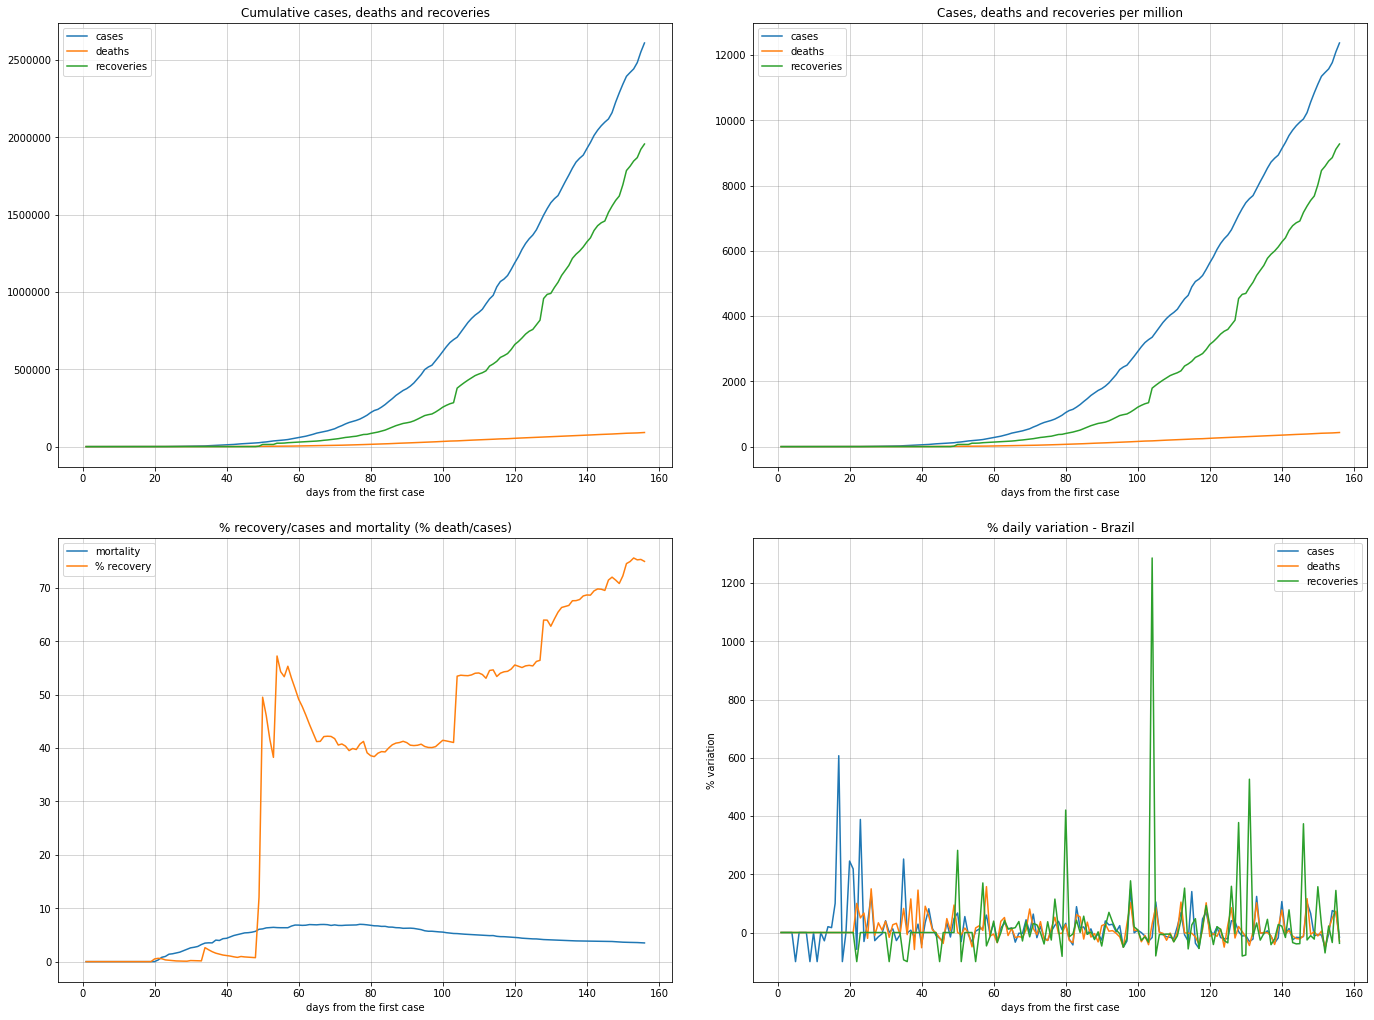

In [11]:
df_br = df[df['country'] == 'Brazil']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulative cases, deaths and recoveries")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)
ax1.plot(df_br.day, df_br.cases, label = 'cases')
ax1.plot(df_br.day, df_br.deaths, label = 'deaths')
ax1.plot(df_br.day, df_br.recoveries, label = 'recoveries')

ax2.set_title("Cases, deaths and recoveries per million")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)
ax2.plot(df_br.day, df_br.cases_million, label = 'cases')
ax2.plot(df_br.day, df_br.deaths_million, label = 'deaths')
ax2.plot(df_br.day, df_br.recoveries_million, label = 'recoveries')


ax3.set_title("% recovery/cases and mortality (% death/cases)")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)
ax3.plot(df_br.day, df_br.perc_death, label = 'mortality')
ax3.plot(df_br.day, df_br.perc_recovery, label = '% recovery')

ax4.set_title("% daily variation - Brazil")
ax4.set_xlabel("days from the first case")
ax4.set_ylabel('% variation')
ax4.grid(color='gray', alpha = 0.4)
ax4.plot(df_br.day, df_br['%var_case_day'], label = 'cases')
ax4.plot(df_br.day, df_br['%var_death_day'], label = 'deaths')
ax4.plot(df_br.day, df_br['%var_recovery_day'], label = 'recoveries')


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.savefig('../analysis/brazil_number_variation.png')

#### Moving averages (last 7 days)

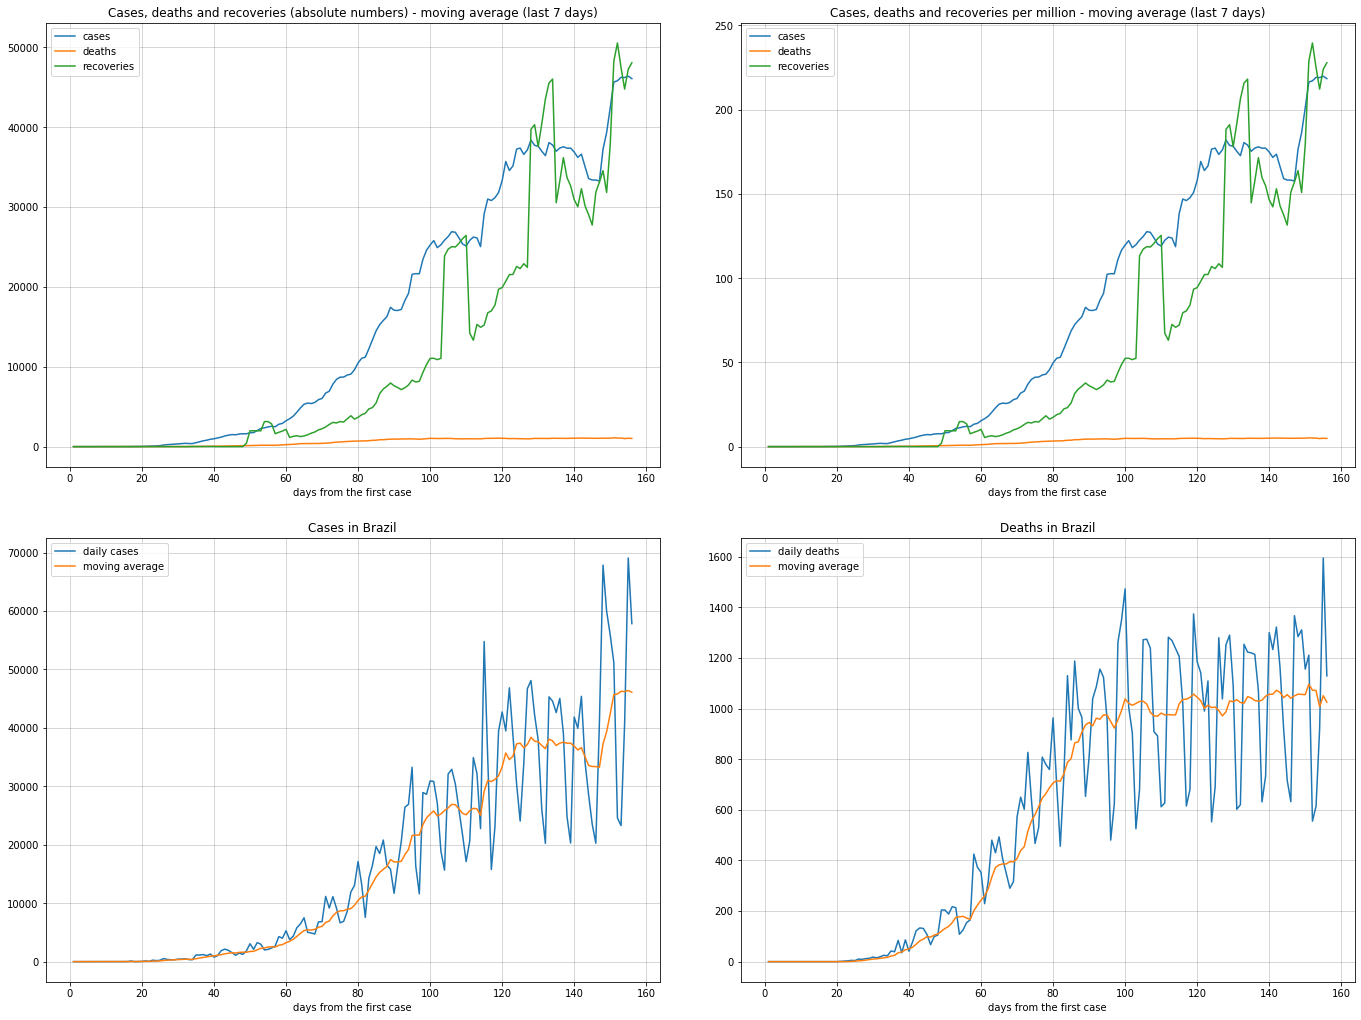

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 15))
fig.tight_layout(pad=5.0)

ax1.set_title("Cases, deaths and recoveries (absolute numbers) - moving average (last 7 days)")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)
ax1.plot(df_br.day, df_br.avg7_cases, label = 'cases')
ax1.plot(df_br.day, df_br.avg7_deaths, label = 'deaths')
ax1.plot(df_br.day, df_br.avg7_recoveries, label = 'recoveries')

ax2.set_title("Cases, deaths and recoveries per million - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)
ax2.plot(df_br.day, df_br.avg7_case_day_million, label = 'cases')
ax2.plot(df_br.day, df_br.avg7_death_day_million, label = 'deaths')
ax2.plot(df_br.day, df_br.avg7_recovery_day_million, label = 'recoveries')

ax3.set_title("Cases in Brazil")
ax3.set_xlabel("days from the first case")
ax3.grid(color='gray', alpha = 0.4)
ax3.plot(df_br.day, df_br.case_day, label = 'daily cases')
ax3.plot(df_br.day, df_br.avg7_cases, label = 'moving average')

ax4.set_title("Deaths in Brazil")
ax4.set_xlabel("days from the first case")
ax4.grid(color='gray', alpha = 0.4)
ax4.plot(df_br.day, df_br.death_day, label = 'daily deaths')
ax4.plot(df_br.day, df_br.avg7_deaths, label = 'moving average')

# ax4.set
# ax4.set_title("# daily quantity - Brazil (absolute numbers)")
# ax4.set_xlabel("days from the first case")
# ax4.set_ylabel('quantity')
# ax4.grid(color='gray', alpha = 0.4)
# ax4.plot(df_br.day, df_br.case_day, label = 'cases')
# ax4.plot(df_br.day, df_br.death_day, label = 'deaths')
# ax4.plot(df_br.day, df_br.recovery_day, label = 'recoveries')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig.savefig('../analysis/brazil_movingAvg.png')

### Generating the html file

In [12]:
f = open('../html/analysis.html', 'w')
f1 = open('../html/templates/analysis_01.html', 'r').read()
# f2 = open('../html/templates/analysis_02.html', 'r').read()
f3 = open('../html/templates/analysis_03.html', 'r').read()

readme = f1
readme += '<p>Estas análises são relativas aos dados da pandemia Covid19 no pelo mundoaté a data de <strong>' + today.strftime("%d/%m/%Y") + '</strong>.</p>'
readme += '<p style="font-size:14px"><i>Estas informações são para uso próprio e não devem ser utilizadas para direcionamentos médicos e/ou políticas públicas.</i></p>'

readme += '<p>Para não prejudicar a visualização dos dados, selecionei os seguintes países mais o Brasil para serem comparados entre si: ' + str(', '.join(monitoredCountries)).title() + '</p>'
readme += '<br></div></div>'
# readme += f2
readme += '        <div class="container">'
readme += '          <h3>Top ' + str(qtdeMonitored) + ' países mais mortais + Brasil</h3>'
readme += '          <p>O ranking é feito a partir da quantidade total de mortes por cada mil habitantes de cada país.</p>'
readme += df_top_deaths.to_html(classes='table', decimal=',', justify='justify')
readme += '        </div>'
readme += '        <br>'
readme += '        <div class="container">'
readme += '          <h3>Top ' + str(qtdeMonitored) + ' países mais transmissíveis + Brasil</h3>'
readme += '          <p>O ranking é feito a partir da quantidade total de casos por cada mil habitantes de cada país.</p>'
readme += df_top_cases.to_html(classes='table', decimal=',', justify='justify')
readme += f3

f.write(readme)
f.close()

###########################################

f = open('../html/analysis_EN.html', 'w')
f1 = open('../html/templates/analysis_EN_01.html', 'r').read()
# f2 = open('../html/templates/analysis_EN_02.html', 'r').read()
f3 = open('../html/templates/analysis_EN_03.html', 'r').read()

readme = f1
readme += '<p>These analysis are related to the Covid19 pandemic data up to <strong>' + today.strftime("%m/%d/%Y") + '</strong>.</p>'
readme += '<p style="font-size:14px"><i>This information is for own use only and shall NOT be used for medical and public policy guidances.</i></p>'
readme += '<p>To permit a better vizualization, I selected the follow countryies plus Brazil to be compared with each other: ' + str(', '.join(monitoredCountries)).title() + '</p>'
readme += '<br></div></div>'
# readme += f2
readme += '        <div class="container">'
readme += '          <h3>Top ' + str(qtdeMonitored) + ' deadliest countries + Brazil</h3>'
readme += '          <p>This ranking is made from the total of deaths per each thousand of population of each country.</p>'
readme += df_top_deaths.to_html(classes='table', decimal=',', justify='justify')
readme += '        </div>'
readme += '        <br>'
readme += '        <div class="container">'
readme += '          <h3>Top ' + str(qtdeMonitored) + ' most transmissible countries + Brazil</h3>'
readme += '          <p>This ranking is made from the total of cases per each thousand of population of each country.</p>'
readme += df_top_cases.to_html(classes='table', decimal=',', justify='justify')
readme += '        </div>'
readme += '        <br>'
readme += f3

f.write(readme)
f.close()
print('World analysis done!')

World analysis done!


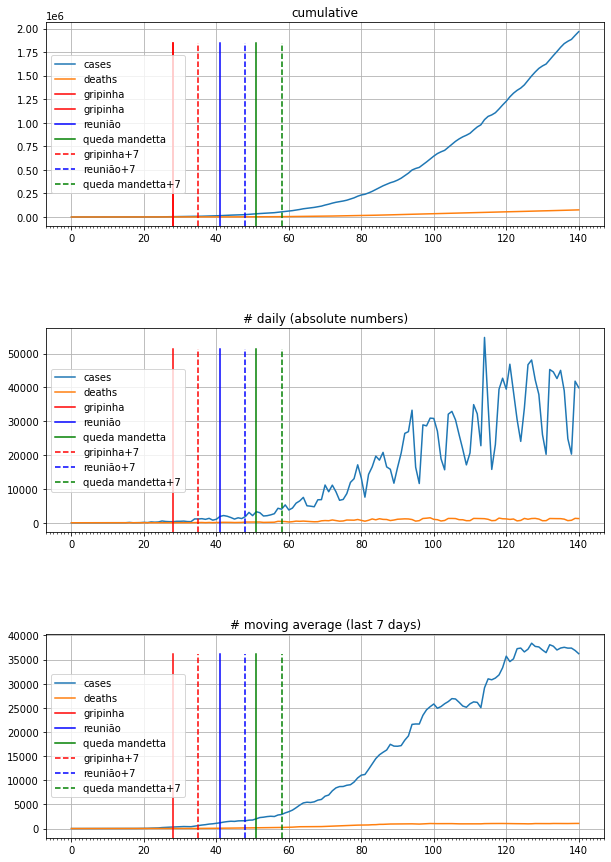

In [13]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

df_br = df[df['country']=='Brazil']

df_br.reset_index(0, inplace=True)

x = df_br.index
gripinha = df_br.loc[df_br.date == '2020-03-24'].index[0]+1
reuniao = df_br.loc[df_br.date == '2020-04-06'].index[0]+1
demissao = df_br.loc[df_br.date == '2020-04-16'].index[0]+1

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,15))
# fig.suptitle('Predicted for ' + df_br.country[0] + ' on ' + today + ' day('+ str(corte) +') ' + ' for the next ' + str(daysToPredict) + ' days')
fig.subplots_adjust(hspace = 0.5)
ax1.set_title('cumulative')
ax1.plot(x, df_br['cases'], label = 'cases')#, linewidths = 0.01)
ax1.plot(x, df_br['deaths'], label = 'deaths')
ax1.grid()
ax1.axvline(x=gripinha, ymin=0, ymax=0.9, color = 'red', label = 'gripinha')
ax1.axvline(x=gripinha, ymin=0, ymax=0.9, color = 'red', label = 'gripinha')
ax1.axvline(x=reuniao, ymin=0, ymax=0.9, color = 'blue', label = 'reunião')
ax1.axvline(x=demissao, ymin=0, ymax=0.9, color = 'green', label = 'queda mandetta')
ax1.axvline(x=gripinha+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'gripinha+7')
ax1.axvline(x=reuniao+7, ymin=0, ymax=0.9, color = 'blue', linestyle = '--', label = 'reunião+7')
ax1.axvline(x=demissao+7, ymin=0, ymax=0.9, color = 'green', linestyle = '--', label = 'queda mandetta+7')
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.legend()

ax2.set_title('# daily (absolute numbers)')
ax2.plot(x, df_br['case_day'], label = 'cases')
ax2.plot(x, df_br['death_day'], label = 'deaths')
ax2.grid()
ax2.axvline(x=gripinha, ymin=0, ymax=0.9, color = 'red', label = 'gripinha')
ax2.axvline(x=reuniao, ymin=0, ymax=0.9, color = 'blue', label = 'reunião')
ax2.axvline(x=demissao, ymin=0, ymax=0.9, color = 'green', label = 'queda mandetta')
ax2.axvline(x=gripinha+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'gripinha+7')
ax2.axvline(x=reuniao+7, ymin=0, ymax=0.9, color = 'blue', linestyle = '--', label = 'reunião+7')
ax2.axvline(x=demissao+7, ymin=0, ymax=0.9, color = 'green', linestyle = '--', label = 'queda mandetta+7')
ax2.xaxis.set_minor_locator(MultipleLocator(1))
ax2.legend()

avg7_cases_million = df_br['case_day'].rolling(window=7).mean().replace([np.inf, -np.inf], 0).replace([np.nan], 0).astype('int')
avg7_death_million = df_br['death_day'].rolling(window=7).mean().replace([np.inf, -np.inf], 0).replace([np.nan], 0).astype('int')

ax3.set_title('# moving average (last 7 days)')
ax3.plot(x, avg7_cases_million, label = 'cases')
ax3.plot(x, avg7_death_million, label = 'deaths')
ax3.grid()

ax3.axvline(x=gripinha, ymin=0, ymax=0.9, color = 'red', label = 'gripinha')
ax3.axvline(x=reuniao, ymin=0, ymax=0.9, color = 'blue', label = 'reunião')
ax3.axvline(x=demissao, ymin=0, ymax=0.9, color = 'green', label = 'queda mandetta')
ax3.axvline(x=gripinha+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'gripinha+7')
ax3.axvline(x=reuniao+7, ymin=0, ymax=0.9, color = 'blue', linestyle = '--', label = 'reunião+7')
ax3.axvline(x=demissao+7, ymin=0, ymax=0.9, color = 'green', linestyle = '--', label = 'queda mandetta+7')
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax3.legend()

# plt.savefig('../predictions/brazil_predictions.png')

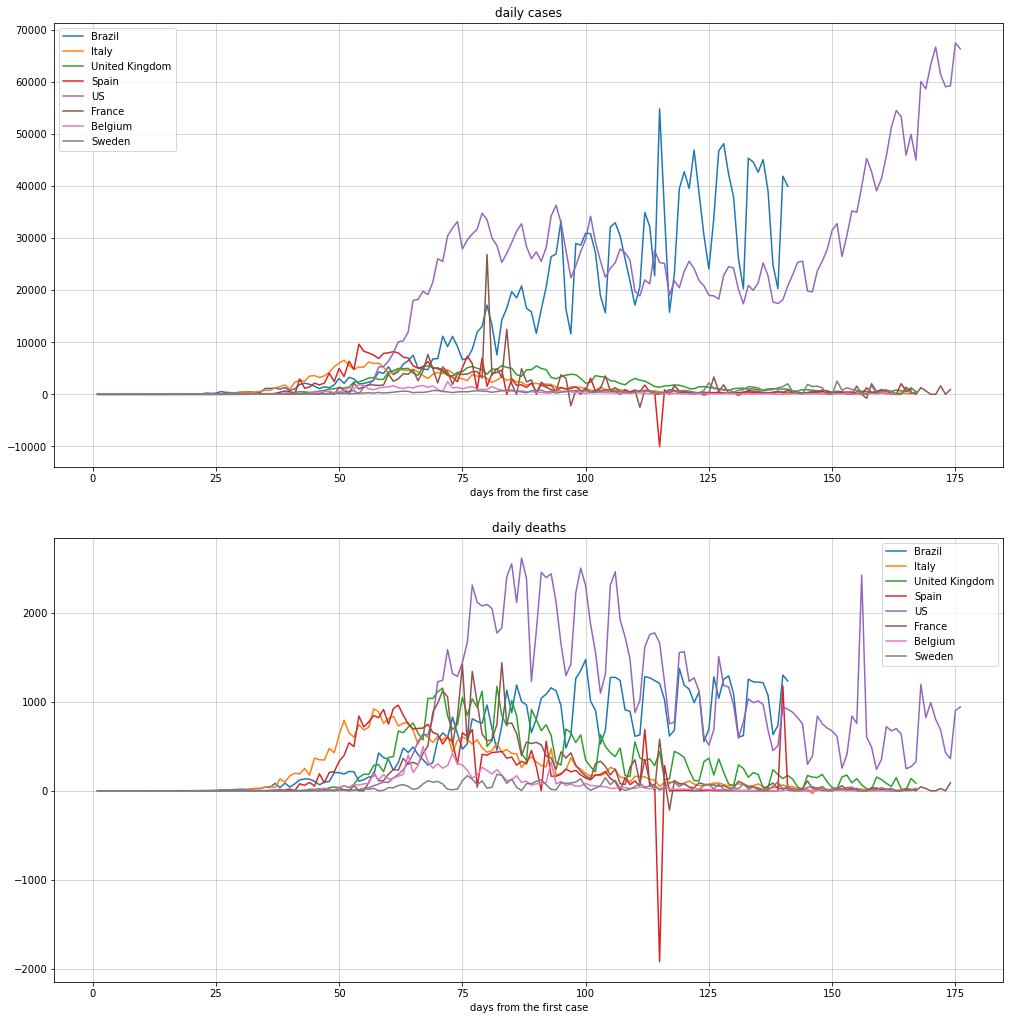

In [14]:
fig, ((ax1, ax2)) = plt.subplots(2,1, figsize=(15, 15))
fig.tight_layout(pad=5.0)

ax1.set_title("daily cases")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("daily deaths")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

for country in monitoredCountries:
    data = df[df['country'] == country]
    ax1.plot(data.day, data.case_day, label = country)
    ax2.plot(data.day, data.death_day, label = country)

ax1.legend()
ax2.legend()

